In [21]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#Read csv file
df = pd.read_csv('Resources/random_sample_1.csv')
df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']] = df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']].astype('datetime64[ns]')
df

,OCPM #,Geo,Region,Country,Country ISO Code,Make/Miss,CROSS #,RCMS #,RETAIN #,Salesforce #,...,F2B,F7,FTP,ea,9d,Agent Id,PREM IND,GA IND,VATS Ind,CQ Applied TS
0,CLKDKDL,NaN,NaN,CANADA,CA,Make,BQJGPDF,0,0,0,...,0,0,0,12/24/2019 10:57,0,ECI,Non-Premier Account,0,N,2019-12-24 11:11:00
1,409QMTZ,NaN,NaN,UNITED STATES,US,Miss,409QMTZ,0,0,0,...,0,0,0,0,0,C-6MCXUS,Non-Premier Account,0,N,2019-12-20 12:39:00
2,409RVRY,NaN,NaN,CANADA,CA,Miss,409RVRY,0,0,0,...,0,0,0,1/2/2020 18:25,0,WEB,Non-Premier Account,0,Y,2020-01-02 18:53:00
3,409RW88,NaN,NaN,UNITED STATES,US,Make,BQJFNTH,0,0,0,...,0,0,0,1/2/2020 18:02,1/3/2020 12:57,WEB,Premier Account,0,N,2020-01-02 18:05:00
4,409PNY9,NaN,NaN,UNITED STATES,US,Miss,BQJJGBQ,0,0,0,...,0,0,0,12/15/2019 15:59,12/20/2019 11:03,WEB,Non-Premier Account,0,N,2019-12-15 22:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,409RF49,NaN,NaN,UNITED STATES,US,Miss,0,0,0,0,...,0,0,0,12/27/2019 16:06,0,WEB,Non-Premier Account,0,N,2019-12-27 16:09:00
374,409Q5D3,NaN,NaN,UNITED STATES,US,Miss,0,0,0,0,...,0,0,0,0,12/19/2019 18:37,C-PUTDUS,Non-Premier Account,0,Y,2019-12-17 10:27:00
375,409RFCW,NaN,NaN,CANADA,CA,Miss,409RFCW,0,0,0,...,0,0,0,0,0,C-P392US,Non-Premier Account,0,N,2019-12-27 16:38:00
376,409STSQ,NaN,NaN,UNITED STATES,US,Make,BQJDLDG,0,0,0,...,0,0,0,1/8/2020 12:25,1/9/2020 10:18,WEB,Non-Premier Account,0,Y,2020-01-08 12:28:00


In [23]:
#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS', 'CQ Applied TS']]
new_df

,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS
0,CLKDKDL,Make,2019-12-24 10:47:00,2019-12-27 10:18:00,2019-12-24 11:11:00
1,409QMTZ,Miss,2019-12-19 12:15:00,2020-01-10 15:51:00,2019-12-20 12:39:00
2,409RVRY,Miss,2020-01-02 15:10:00,2020-01-13 14:11:00,2020-01-02 18:53:00
3,409RW88,Make,2020-01-02 16:23:00,2020-01-06 15:51:00,2020-01-02 18:05:00
4,409PNY9,Miss,2019-12-13 23:57:00,2020-01-10 09:21:00,2019-12-15 22:05:00
...,...,...,...,...,...
373,409RF49,Miss,2019-12-27 15:19:00,2020-01-02 21:20:00,2019-12-27 16:09:00
374,409Q5D3,Miss,2019-12-17 10:08:00,2019-12-23 21:30:00,2019-12-17 10:27:00
375,409RFCW,Miss,2019-12-27 16:34:00,2020-01-08 13:33:00,2019-12-27 16:38:00
376,409STSQ,Make,2020-01-08 09:50:00,2020-01-10 11:53:00,2020-01-08 12:28:00


In [24]:
#Add column to hold difference between SR Close TS and SR Create TS
new_df['Close and Create Diff'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Add column to hold difference between CQ Applied TS and SR Create TS
new_df['CQ and Create Diff'] = (new_df.loc[:, 'CQ Applied TS'] - new_df.loc[:, 'SR Create TS'])
new_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS,Close and Create Diff,CQ and Create Diff
0,CLKDKDL,Make,2019-12-24 10:47:00,2019-12-27 10:18:00,2019-12-24 11:11:00,2 days 23:31:00,0 days 00:24:00
1,409QMTZ,Miss,2019-12-19 12:15:00,2020-01-10 15:51:00,2019-12-20 12:39:00,22 days 03:36:00,1 days 00:24:00
2,409RVRY,Miss,2020-01-02 15:10:00,2020-01-13 14:11:00,2020-01-02 18:53:00,10 days 23:01:00,0 days 03:43:00
3,409RW88,Make,2020-01-02 16:23:00,2020-01-06 15:51:00,2020-01-02 18:05:00,3 days 23:28:00,0 days 01:42:00
4,409PNY9,Miss,2019-12-13 23:57:00,2020-01-10 09:21:00,2019-12-15 22:05:00,27 days 09:24:00,1 days 22:08:00
...,...,...,...,...,...,...,...
373,409RF49,Miss,2019-12-27 15:19:00,2020-01-02 21:20:00,2019-12-27 16:09:00,6 days 06:01:00,0 days 00:50:00
374,409Q5D3,Miss,2019-12-17 10:08:00,2019-12-23 21:30:00,2019-12-17 10:27:00,6 days 11:22:00,0 days 00:19:00
375,409RFCW,Miss,2019-12-27 16:34:00,2020-01-08 13:33:00,2019-12-27 16:38:00,11 days 20:59:00,0 days 00:04:00
376,409STSQ,Make,2020-01-08 09:50:00,2020-01-10 11:53:00,2020-01-08 12:28:00,2 days 02:03:00,0 days 02:38:00


In [25]:
#Descriptive statistics for SR and CQ differences
summary = pd.DataFrame({
    'CX and RC': new_df['Close and Create Diff'].describe(),
    'CQ and RC': new_df['CQ and Create Diff'].describe()
})
summary

,CX and RC,CQ and RC
count,378,378
mean,12 days 11:05:05.555555,0 days 11:33:30.952380
std,10 days 18:13:07.031967,2 days 01:12:40.591260
min,0 days 00:06:00,0 days 00:01:00
25%,4 days 03:26:30,0 days 00:07:00
50%,8 days 02:32:00,0 days 00:38:00
75%,18 days 03:25:30,0 days 12:10:45
max,55 days 19:57:00,37 days 17:50:00


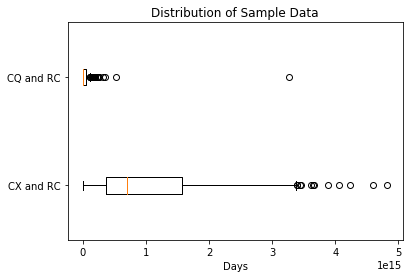

In [26]:
#Create box plots to visualize data
fig, ax = plt.subplots()
ax.set_title('Distribution of Sample Data')
ax.set_xlabel('Days')
ax.boxplot([new_df['Close and Create Diff'], new_df['CQ and Create Diff']], labels = ['CX and RC', 'CQ and RC'], vert = False)
#ax.boxplot(new_df['CQ and Create Diff'], labels = ['CQ and RC'], vert = False)
#ax.boxplot([new_df['Close and Create Diff']], labels = ['CX and RC'], vert = False)
plt.show()

In [27]:
cx_rc_diff = 12 + ((11*60*60) + (5*60) + (5.55))/((24*60*60))
cq_rc_diff = 0 + ((11*60*60) + (33*60) + (30.95))/((24*60*60))
print(f'Sample KPI (CX and RC Difference): {round(cx_rc_diff, 2)} ±5.00%')
print(f'Sample KPI (CQ and RC Difference): {round(cq_rc_diff, 2)} ±5.00%')

Sample KPI (CX and RC Difference): 12.46 ±5.00%
Sample KPI (CQ and RC Difference): 0.48 ±5.00%


In [28]:
#Quartiles CX and RC
q1 = 4 + ((3 * 60 * 60) + (26 * 60) + (30))/((24*60*60))
q2 = 8 + ((2 * 60 * 60) + (32 * 60) + (0))/((24*60*60))
q3 = 18 + ((3 * 60 * 60) + (25 * 60) + (30))/((24*60*60))
print(f'CX and RC Quartiles')
print(f'Q1: {round(q1,2)}')
print(f'Q2: {round(q2,2)}')
print(f'Q3: {round(q3,2)}')

CX and RC Quartiles
Q1: 4.14
Q2: 8.11
Q3: 18.14


In [29]:
#Quartiles CQ and RC
q1 = 0 + ((0 * 60 * 60) + (7 * 60) + (0))/((24*60*60))
q2 = 0 + ((0 * 60 * 60) + (38 * 60) + (0))/((24*60*60))
q3 = 0 + ((12 * 60 * 60) + (10 * 60) + (45))/((24*60*60))
print(f'CQ and RC Quartiles')
print(f'Q1: {round(q1,2)}')
print(f'Q2: {round(q2,2)}')
print(f'Q3: {round(q3,2)}')

CQ and RC Quartiles
Q1: 0.0
Q2: 0.03
Q3: 0.51
